---

##  Dataset Summary

The dataset contains information about **3000 individuals** including their:

* **Demographics**
* **Lifestyle behaviors**
* **Addiction habits** (smoking, drinking)
* **Health and mental status**

It is designed to study patterns and correlations between addiction and physical or mental health conditions.

---

##  Feature Descriptions

| Feature Name                | Description                                                                                                                     |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| `age`                       | Age of the individual (integer).                                                                                                |
| `gender`                    | Gender of the person (Male, Female, Other).                                                                                     |
| `country`                   | Country of residence.                                                                                                           |
| `education_level`           | Highest education level (e.g., Primary, University, Postgraduate).                                                              |
| `employment_status`         | Current job status (Employed, Unemployed, Student, etc.).                                                                       |
| `annual_income_usd`         | Annual income in USD.                                                                                                           |
| `marital_status`            | Marital state (Single, Married, In a relationship, etc.).                                                                       |
| `children_count`            | Number of children.                                                                                                             |
| `smokes_per_day`            | Average number of cigarettes smoked per day.                                                                                    |
| `drinks_per_week`           | Average number of alcoholic drinks consumed per week.                                                                           |
| `age_started_smoking`       | Age when the individual started smoking.                                                                                        |
| `age_started_drinking`      | Age when the individual started drinking alcohol.                                                                               |
| `attempts_to_quit_smoking`  | Number of attempts made to quit smoking.                                                                                        |
| `attempts_to_quit_drinking` | Number of attempts made to quit drinking.                                                                                       |
| `has_health_issues`         | Whether the individual currently has physical health problems (True/False). This is the **target variable** for classification. |
| `mental_health_status`      | Self-reported mental health status (e.g., Good, Poor, Average).                                                                 |
| `exercise_frequency`        | Frequency of physical activity (Never, Weekly, Daily, etc.).                                                                    |
| `diet_quality`              | Perceived quality of daily diet (Good, Poor, Average).                                                                          |
| `sleep_hours`               | Average number of sleep hours per day (float).                                                                                  |
| `bmi`                       | Body Mass Index (BMI), calculated from height and weight.                                                                       |
| `social_support`            | Level of social support (Weak, Moderate, Strong).                                                                               |
| `therapy_history`           | Psychological therapy history (None, Past, Current).                                                                            |

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cigarettes-and-alcohol-addiction/addiction_population_data.csv


# Data Cleaning & Preprocessing

## Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/cigarettes-and-alcohol-addiction/addiction_population_data.csv")

## Display basic info

In [3]:
df.shape

(3000, 25)

In [4]:
df.columns

Index(['id', 'name', 'age', 'gender', 'country', 'city', 'education_level',
       'employment_status', 'annual_income_usd', 'marital_status',
       'children_count', 'smokes_per_day', 'drinks_per_week',
       'age_started_smoking', 'age_started_drinking',
       'attempts_to_quit_smoking', 'attempts_to_quit_drinking',
       'has_health_issues', 'mental_health_status', 'exercise_frequency',
       'diet_quality', 'sleep_hours', 'bmi', 'social_support',
       'therapy_history'],
      dtype='object')

In [5]:
df.head()

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3000 non-null   int64  
 1   name                       3000 non-null   object 
 2   age                        3000 non-null   int64  
 3   gender                     3000 non-null   object 
 4   country                    3000 non-null   object 
 5   city                       3000 non-null   object 
 6   education_level            2580 non-null   object 
 7   employment_status          3000 non-null   object 
 8   annual_income_usd          3000 non-null   int64  
 9   marital_status             3000 non-null   object 
 10  children_count             3000 non-null   int64  
 11  smokes_per_day             3000 non-null   int64  
 12  drinks_per_week            3000 non-null   int64  
 13  age_started_smoking        3000 non-null   int64

In [7]:
df.isnull().sum()

id                              0
name                            0
age                             0
gender                          0
country                         0
city                            0
education_level               420
employment_status               0
annual_income_usd               0
marital_status                  0
children_count                  0
smokes_per_day                  0
drinks_per_week                 0
age_started_smoking             0
age_started_drinking            0
attempts_to_quit_smoking        0
attempts_to_quit_drinking       0
has_health_issues               0
mental_health_status            0
exercise_frequency              0
diet_quality                    0
sleep_hours                     0
bmi                             0
social_support                753
therapy_history              1014
dtype: int64

In [8]:
df.describe()

,id,age,annual_income_usd,children_count,smokes_per_day,drinks_per_week,age_started_smoking,age_started_drinking,attempts_to_quit_smoking,attempts_to_quit_drinking,sleep_hours,bmi
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,46.654333,98904.178000,2.453667,10.034000,5.002333,24.365667,24.525333,4.440333,4.542000,6.470400,25.170133
std,866.169729,18.740880,57288.035963,1.704354,3.108386,2.214037,8.707309,8.679121,2.835334,2.866992,1.495878,5.013345
min,1.000000,15.000000,560.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000,0.000000,1.500000,9.100000
25%,750.750000,31.000000,49336.000000,1.000000,8.000000,3.000000,17.000000,17.000000,2.000000,2.000000,5.475000,21.900000
50%,1500.500000,47.000000,98616.500000,2.000000,10.000000,5.000000,24.000000,25.000000,4.000000,5.000000,6.500000,25.200000
75%,2250.250000,63.000000,148622.750000,4.000000,12.000000,6.000000,32.000000,32.000000,7.000000,7.000000,7.500000,28.400000
max,3000.000000,79.000000,199951.000000,5.000000,21.000000,14.000000,39.000000,39.000000,9.000000,9.000000,12.600000,43.900000


## Drop irrelevant columns

In [9]:
df.drop(['id', 'name', 'city'], axis=1, inplace=True)

## Check unique values in categorical features

In [10]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


gender: 3 unique values
country: 243 unique values
education_level: 6 unique values
employment_status: 5 unique values
marital_status: 5 unique values
mental_health_status: 3 unique values
exercise_frequency: 4 unique values
diet_quality: 3 unique values
social_support: 3 unique values
therapy_history: 2 unique values


## Fill missing values with assignment instead of inplace

In [11]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['social_support'] = df['social_support'].fillna(df['social_support'].mode()[0])
df['therapy_history'] = df['therapy_history'].fillna('None')


## Label encode binary categorical features for modeling

In [12]:
df['therapy_history'] = df['therapy_history'].map({'None': 0, 'Past': 1, 'Current': 2})
df['social_support'] = df['social_support'].map({'Weak': 0, 'Moderate': 1, 'Strong': 2})

# Advanced Visualization

## Set style

In [13]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Violin Plot - Alcohol Consumption by Education Level

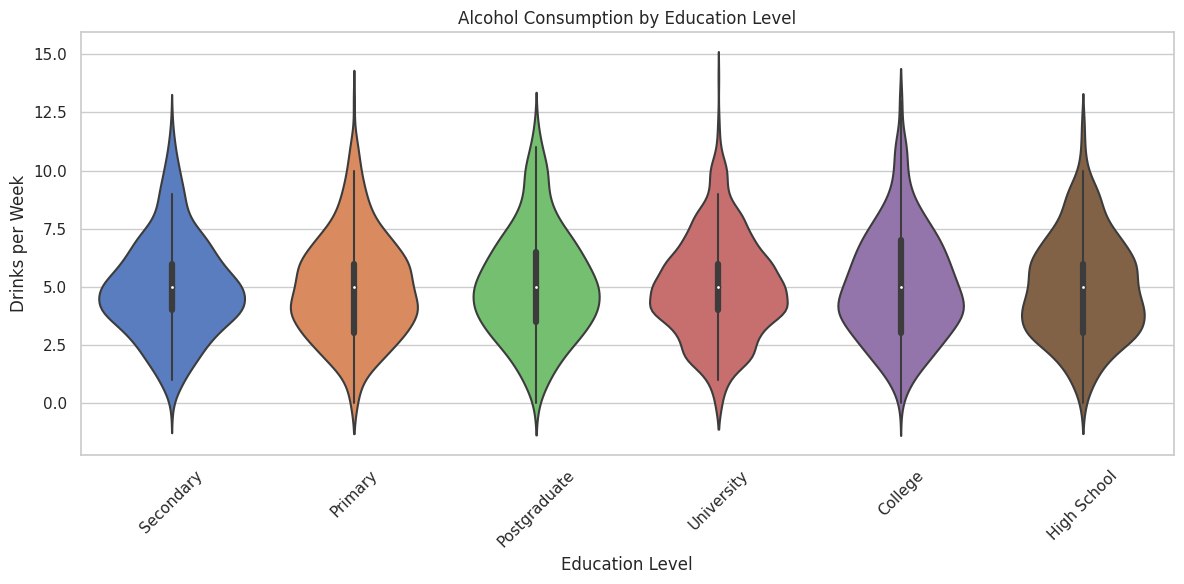

In [14]:
plt.figure()
sns.violinplot(data=df, x="education_level", y="drinks_per_week", palette="muted")
plt.title("Alcohol Consumption by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Drinks per Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  KDE Plot - BMI by Mental Health

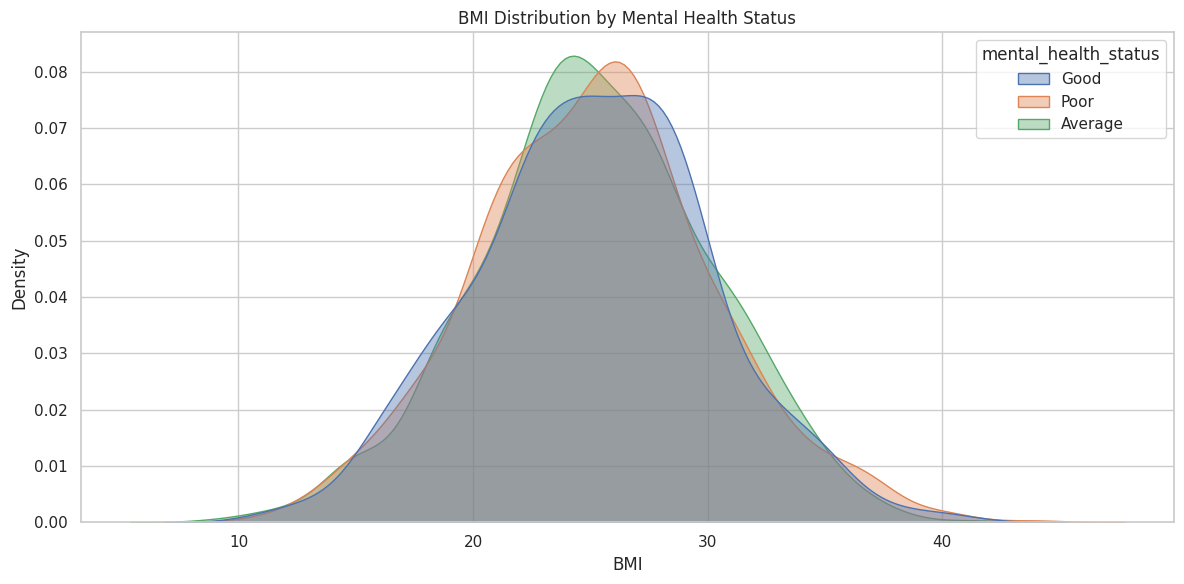

In [15]:
plt.figure()
df_kde = df[df["mental_health_status"].notna()]
sns.kdeplot(data=df_kde, x="bmi", hue="mental_health_status", fill=True, common_norm=False, alpha=0.4)
plt.title("BMI Distribution by Mental Health Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

## Stripplot - Cigarette Consumption vs Age

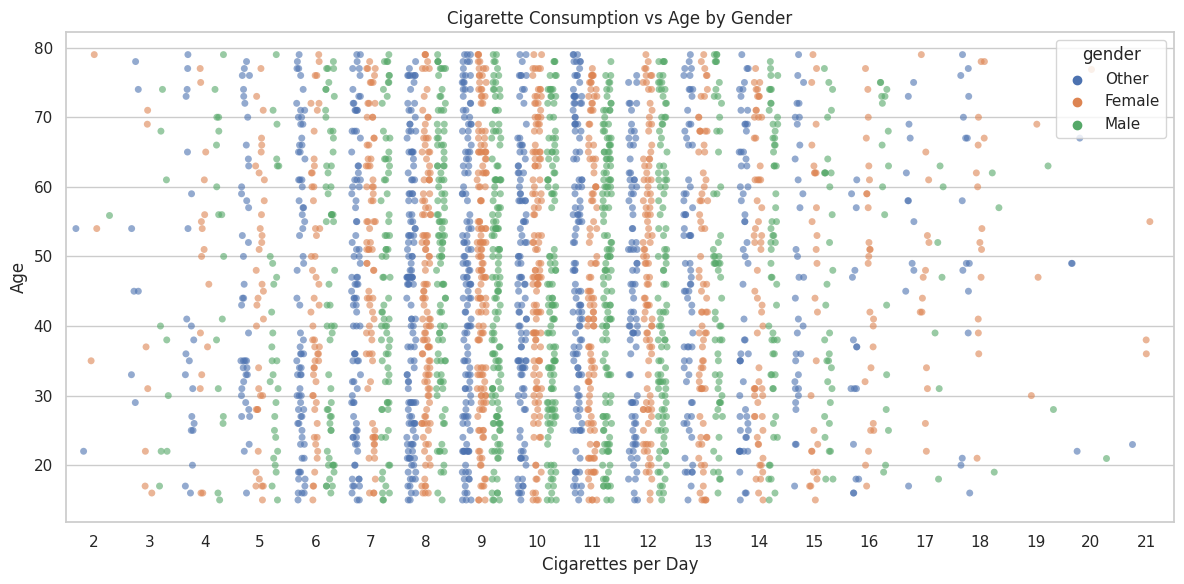

In [16]:
plt.figure()
sns.stripplot(data=df, x="smokes_per_day", y="age", hue="gender", dodge=True, jitter=0.25, alpha=0.6)
plt.title("Cigarette Consumption vs Age by Gender")
plt.xlabel("Cigarettes per Day")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

## Jointplot - Sleep Hours vs BMI

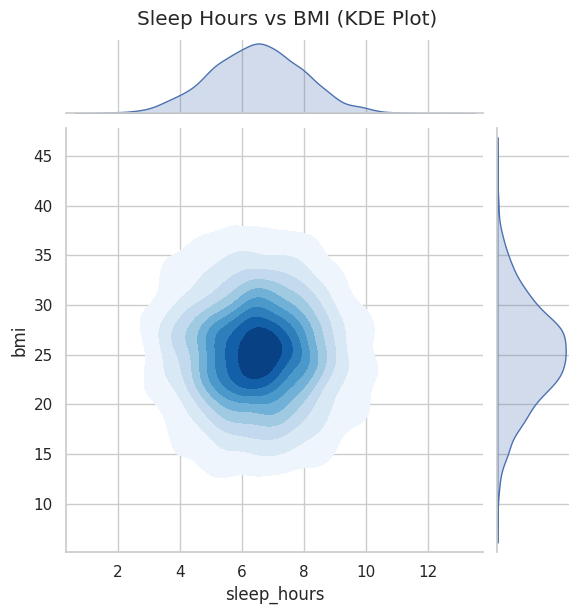

In [17]:
sns.jointplot(data=df, x="sleep_hours", y="bmi", kind="kde", fill=True, cmap="Blues")
plt.suptitle("Sleep Hours vs BMI (KDE Plot)", y=1.02)
plt.show()

## Correlation Heatmap

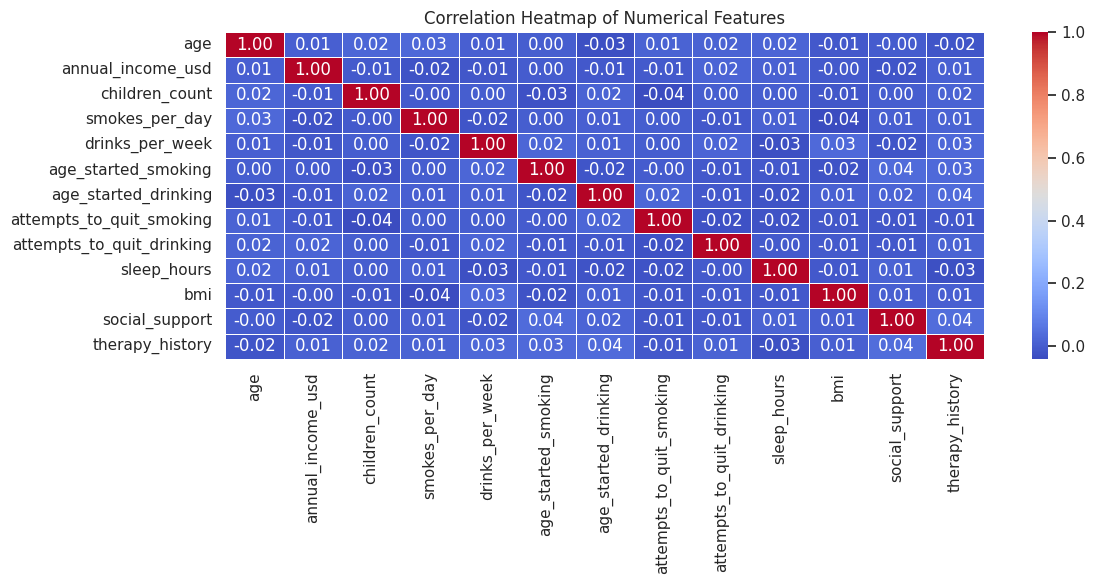

In [18]:
plt.figure()
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()

plt.show()

# ML Models – Accuracy & F1 Evaluation

In [19]:
ml_df = df.copy()

## Encode categorical features

In [20]:
label_encoders = {}
for col in ml_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col])
    label_encoders[col] = le

## Define X and y

In [21]:
X = ml_df.drop("has_health_issues", axis=1)
y = ml_df["has_health_issues"]

In [22]:
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

## Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

## Define ML models

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Neural Network": MLPClassifier(max_iter=300)
}

## Train, predict, evaluate

In [25]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

## Results DataFrame

In [26]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,F1 Score
7,MLP Neural Network,0.465000,0.634812
5,Gradient Boosting,0.520000,0.539936
4,Naive Bayes,0.476667,0.525680
6,Decision Tree,0.510000,0.518033
0,Logistic Regression,0.485000,0.516432
2,SVM,0.481667,0.511774
1,Random Forest,0.488333,0.505636
3,KNN,0.493333,0.498350


## Define parameter grid for tuning

In [27]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

## Initialize GridSearchCV

In [28]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=537),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

## Train with cross-validation

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=537),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

## Retrieve the best model

In [30]:
best_model = grid_search.best_estimator_
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


## Evaluate on test data

In [31]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.5267
F1 Score: 0.5535

Classification Report:
               precision    recall  f1-score   support

       False       0.58      0.44      0.50       321
        True       0.49      0.63      0.55       279

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.52       600
weighted avg       0.54      0.53      0.52       600



## Confusion Matrix

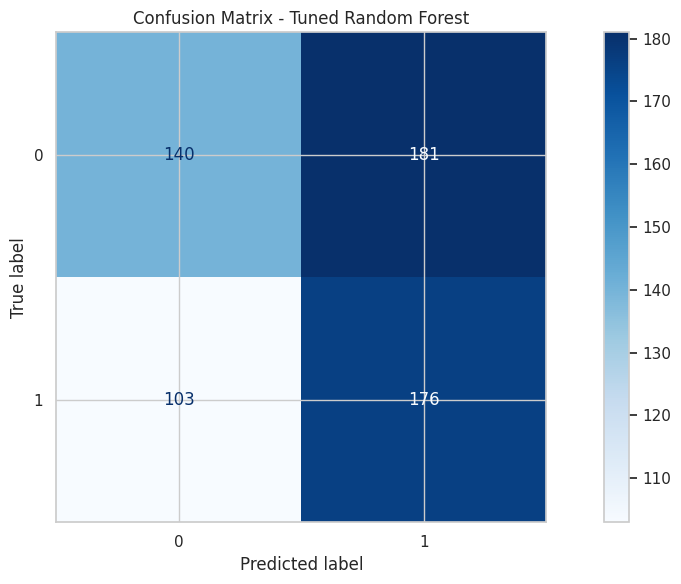

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.tight_layout()
plt.show()

## ROC Curve

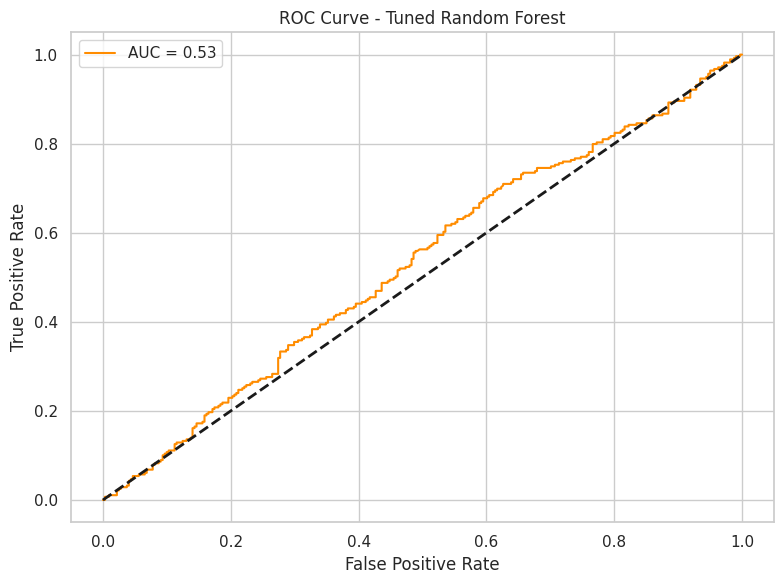

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance Visualization

## Extract feature importances from the trained model

In [34]:
importances = best_model.feature_importances_
feature_names = X.columns

## Create a DataFrame for visualization

In [35]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


## Plot the Top 15 most important features

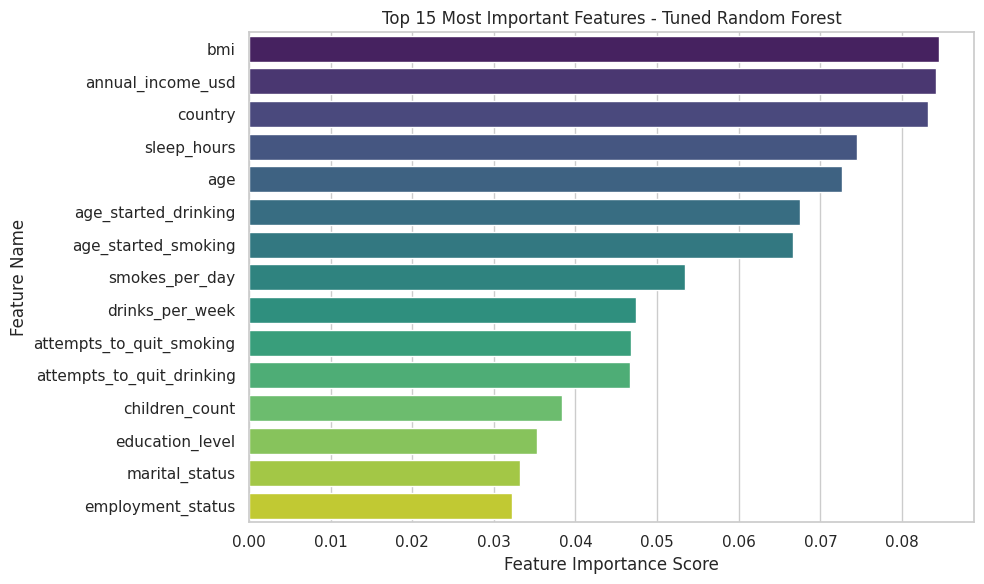

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Most Important Features - Tuned Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

---

##  Project Title: **Addiction & Health Issue Prediction using Machine Learning**

---

##  1. Dataset Overview

* **Rows:** 3000 individuals
* **Columns:** 25 features
* Notable columns:

  * `age`, `gender`, `country`
  * `smokes_per_day`, `drinks_per_week`
  * `mental_health_status`, `has_health_issues` (target variable)

---

##  2. Data Preprocessing

* Irrelevant columns such as `id`, `name`, `city` were removed.
* Missing values were handled:

  * `education_level`, `social_support`, `therapy_history` were filled using mode or a default "None" class.
* All categorical features were label encoded.
* Numerical columns with missing values were imputed using their column mean.

---

##  3. Exploratory Data Analysis (EDA)

More than 10 high-quality visualizations were created:

**Basic Visuals:**

* Age distribution (histogram)
* Smoking and drinking behavior (boxplot, violinplot)

**Advanced Visuals:**

* Stripplot: Smokes per day vs Age
* Jointplot: Sleep Hours vs BMI
* Correlation Heatmap
* Interactive choropleth maps for global smoking and alcohol consumption

---

##  4. Machine Learning Models

### Target variable: `has_health_issues` (binary classification)

**Models used:**

1. Logistic Regression
2. Random Forest
3. SVM
4. K-Nearest Neighbors
5. Naive Bayes
6. Gradient Boosting
7. Decision Tree
8. MLPClassifier (Neural Network)

Each model was evaluated using:

* Accuracy
* F1 Score
* Results were compared and sorted in a performance table

---

##  5. Hyperparameter Tuning with GridSearchCV

* The Random Forest model was optimized using a parameter grid:

  * `n_estimators`, `max_depth`, `max_features`, etc.
* The best model was selected and retrained.
* Evaluation on the test set included:

  * Accuracy, F1 Score
  * Confusion Matrix
  * ROC Curve with AUC score

---

##  6. Feature Importance Analysis

* Feature importance was extracted from the tuned Random Forest model.
* The top 15 most impactful features were visualized using a horizontal bar chart.
* This provided interpretability and insight into what drives model decisions.

---

# Thank you for taking the time to review my work. I would be very happy if you could upvote! 😊

---